In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast 
from datetime import datetime as dt

%matplotlib inline

In [2]:
df = pd.read_csv('assets/glassdoor_clean.csv')
orig_len = len(df)
print(len(df))
df.head(2)

601


,title,dateposted,validthrough,industry,orgname,cat,descr,stars,jobid,minsal,maxsal,medsal,empid,jobtitleid,jobreqid,url
0,Data Scientist,2018-04-16,2018-05-22,Information Technology,Integral Ad Science,"['15-1111.00', 'Computer and Information Resea...",We are seeking a Data Scientist to join our te...,3.7,2735259369,120000,174000,145000,782797,119899,3203739089,http://www.glassdoor.com/partner/jobListing.ht...
1,Data Scientist,2018-04-19,2018-05-22,Travel & Tourism,HotelTonight,"['15-1111.00', 'Computer and Information Resea...",HotelTonight makes it remarkably easy to book ...,4.6,2699359507,111000,163000,135000,639341,119899,3168666373,http://www.glassdoor.com/partner/jobListing.ht...


In [3]:
def rand_jitter(arr, frac = 0.02):
    '''Add random jitter to an array'''
    displacement = frac*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * displacement

### category

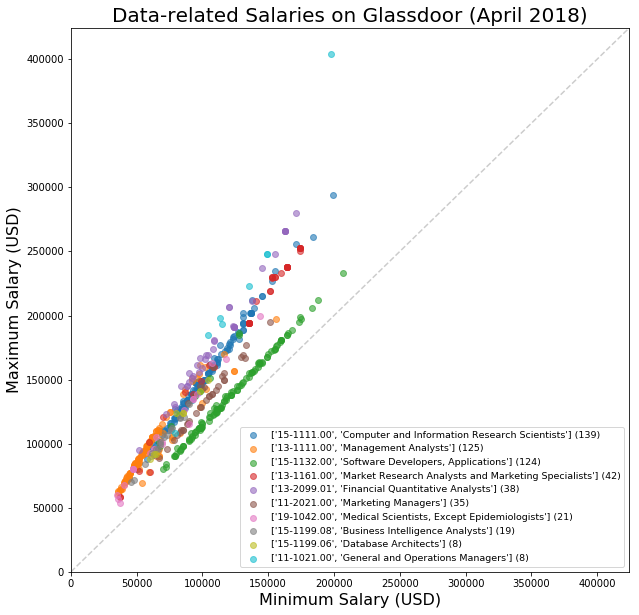

In [4]:
plt.figure(figsize = (10, 10))

for cat in list(df['cat'].value_counts().index):
    lil_df = df.loc[df['cat'] == cat, ['minsal', 'maxsal']]
    if len(lil_df) > 7:
        plt.scatter(lil_df['minsal'], lil_df['maxsal'], label = '{} ({})'.format(cat, len(lil_df)), alpha = 0.6)

plt.title('Data-related Salaries on Glassdoor (April 2018)', fontsize = 20)
plt.legend(loc = 'best', fontsize = 9.5)
plt.xlim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.ylim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.plot([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], [0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], ls = '--', color = 'gray', alpha = 0.4)
plt.xlabel('Minimum Salary (USD)', fontsize = 16)
plt.ylabel('Maximum Salary (USD)', fontsize = 16)
plt.show();

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Looks like I don't want "Software Developers, Applications" for salary reasons and, more importantly, because that's not what I do; ditto for "Management Analysts" and "Marketing Managers."  

In [5]:
mask = [False if 
        ('15-1132.00' in x) |  ## software developers/applications X
        ('11-2021.00' in x) |  ## marketing managers X
        ('13-1111.00' in x)   ## management analysts X
        else True for x in df['cat']]
df = df[mask]
print(len(df)/orig_len)

0.5274542429284526


In [6]:
df['cat'].value_counts()

['15-1111.00', 'Computer and Information Research Scientists']                                                    139
['13-1161.00', 'Market Research Analysts and Marketing Specialists']                                               42
['13-2099.01', 'Financial Quantitative Analysts']                                                                  38
['19-1042.00', 'Medical Scientists, Except Epidemiologists']                                                       21
['15-1199.08', 'Business Intelligence Analysts']                                                                   19
['15-1199.06', 'Database Architects']                                                                               8
['11-1021.00', 'General and Operations Managers']                                                                   8
['11-3021.00', 'Computer and Information Systems Managers']                                                         6
['19-1029.01', 'Bioinformatics Scientists']             

In [7]:
mask = [False if 
        
        ## not what i do
        ('15-1199.08' in x) |  ## 'Business Intelligence Analysts'
        ('11-3031.02' in x) |  ## 'Financial Managers, Branch or Department'
        ('11-2011.00' in x) |  ## 'Advertising and Promotions Managers'
        ('11-9021.00' in x) |  ## 'Construction Managers'
        ('11-9041.00' in x) |  ## 'Architectural and Engineering Managers'
        ('11-1021.00' in x) |  ## 'General and Operations Managers'
        ('15-1199.08' in x) |  ## 'Business Intelligence Analysts'
        ('13-2051.00' in x) |  ## 'Financial Analysts' 
        ('15-1199.07' in x) |  ## 'Data Warehousing Specialists' 
        ('15-1199.06' in x) |  ## 'Database Architects'
        ('41-3031.02' in x) |  ## 'Sales Agents, Financial Services'
        ('17-2112.00' in x) |  ## 'Industrial Engineers'
        ('15-1134.00' in x) |  ## 'Web Developers'

        ('19-4061.00' in x) |  ## 'Social Science Research Assistants'
        ('13-2011.02' in x) |  ## 'Auditors'
        ('15-1121.00' in x) |  ## 'Computer Systems Analysts'
        ('11-9121.01' in x) |  ## 'Clinical Research Coordinators'
        ('51-4061.00' in x) |  ## 'Model Makers, Metal and Plastic'
        ('15-1199.09' in x) |  ## 'Information Technology Project Managers'
        ('41-4012.00' in x) |  ## 'Sales Reps..'
        ('11-3051.00' in x) |  ## 'Industrial Production Managers'
        ('19-3031.02' in x) |  ## 'Clinical Psychologists'
        ('11-3021.00' in x) |  ## 'Computer and Information Systems Managers'
        ('11-9199.00' in x)   ## 'Managers, All Other'

        else True for x in df['cat']]
df = df[mask]
print(len(df)/orig_len)

0.41098169717138106


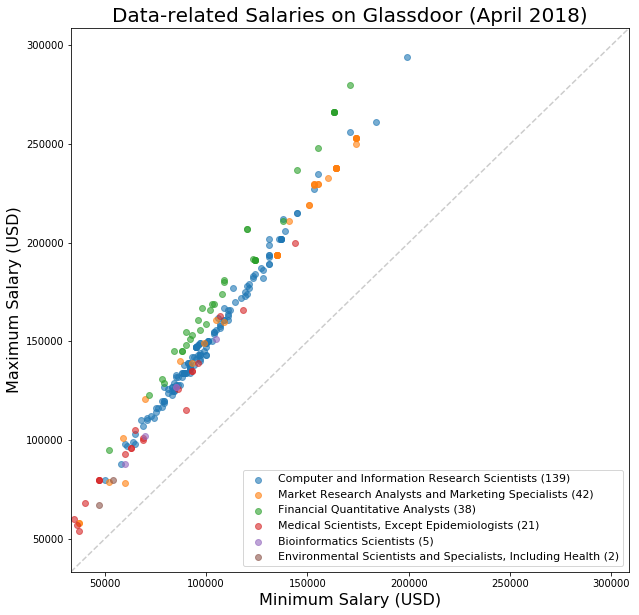

In [8]:
plt.figure(figsize = (10, 10))

for cat in list(df['cat'].value_counts().index):
    lil_label = ast.literal_eval(cat)[1]
    lil_df = df.loc[df['cat'] == cat, ['minsal', 'maxsal']]
#     if len(lil_df) > 1:
    plt.scatter(lil_df['minsal'], lil_df['maxsal'], label = '{} ({})'.format(lil_label, len(lil_df)), alpha = 0.6)

plt.title('Data-related Salaries on Glassdoor (April 2018)', fontsize = 20)
plt.legend(loc = 'best', fontsize = 11)
plt.xlim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.ylim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.plot([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], [0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], ls = '--', color = 'gray', alpha = 0.4)
plt.xlabel('Minimum Salary (USD)', fontsize = 16)
plt.ylabel('Maximum Salary (USD)', fontsize = 16)
plt.show();

### description

In [9]:
df['wcount'] = [len(x.split(' ')) for x in df['descr']]

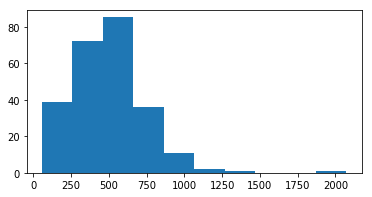

In [10]:
plt.figure(figsize = (6, 3))
df['wcount'].hist()
plt.grid(False)
plt.show();

In [11]:
for which in [
    'github', 
    'python', 
    'matplotlib',
    'd3',
    'open source', 
    ' sas ', 
    'c++', 
    'sql',
    ' aws ',
    'hadoop',
    'architecture',
    'kaggle', 
    'women', 
    'female', 
    'travel',
    'maternity',
    'parental',
    'remote'
]:
    print('{}: {}'.format(which, sum([True if which in x.lower() else False for x in df['descr']])))

github: 4
python: 161
matplotlib: 4
d3: 10
open source: 24
 sas : 6
c++: 53
sql: 96
 aws : 12
hadoop: 57
architecture: 19
kaggle: 3
women: 11
female: 6
travel: 33
maternity: 1
parental: 7
remote: 2


In [12]:
mask = [True if 'matplotlib' in x.lower() else False for x in df['descr']]

df[mask]['orgname'].value_counts()

MassMutual                         1
Open Systems Technologies (NYC)    1
PwC                                1
New York Stem Cell Foundation      1
Name: orgname, dtype: int64

In [13]:
print(len(df))

exclude = [
    ' sas ', 
#     'hadoop'
]
for wordlet in exclude:
    mask = [False if wordlet in x.lower() else True for x in df['descr']]
    df = df[mask]

print(len(df))

require = [
    'python',
    'data sci'
]
for wordlet in require:
    mask = [True if wordlet in x.lower() else False for x in df['descr']]
    df = df[mask]
    
print(len(df))

247
241
94


### stars

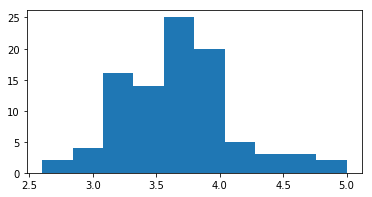

In [14]:
plt.figure(figsize = (6, 3))
df['stars'].hist()
plt.grid(False)
plt.show();

In [15]:
df.loc[df['stars'] < 3.0, 'orgname'].value_counts()

Wonder          1
Aptus Health    1
Name: orgname, dtype: int64

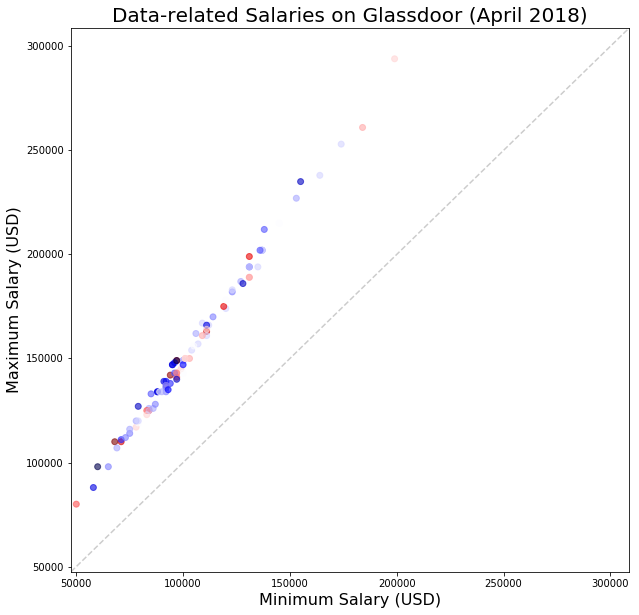

In [16]:
plt.figure(figsize = (10, 10))


plt.scatter(
    df['minsal'], 
    df['maxsal'], 
    alpha = 0.6, 
    c = df['stars'],
    cmap = 'seismic'
)

plt.title('Data-related Salaries on Glassdoor (April 2018)', fontsize = 20)
plt.xlim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.ylim([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()])
plt.plot([0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], [0.95*df['minsal'].min(), 1.05*df['maxsal'].max()], ls = '--', color = 'gray', alpha = 0.4)
plt.xlabel('Minimum Salary (USD)', fontsize = 16)
plt.ylabel('Maximum Salary (USD)', fontsize = 16)
plt.show();

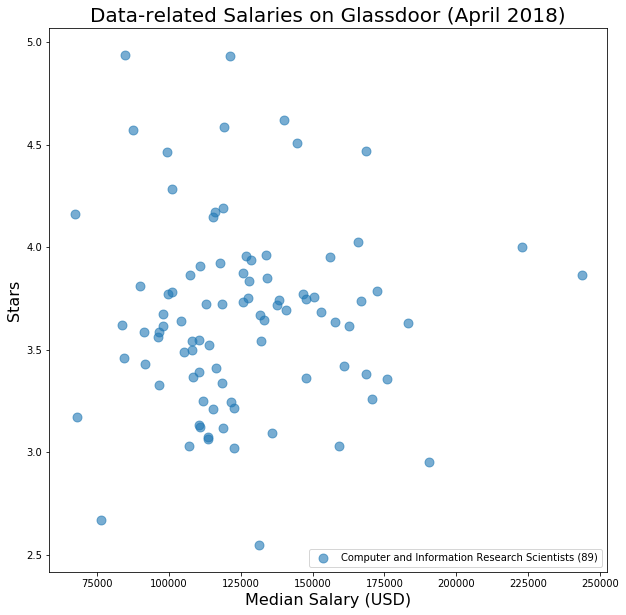

In [17]:
plt.figure(figsize = (10, 10))

for cat in list(df['cat'].value_counts().index):
    lil_label = ast.literal_eval(cat)[1].split(',')[0]
    lil_df = df.loc[df['cat'] == cat, ['stars', 'medsal']]
    if len(lil_df) > 10:
        plt.scatter(
            rand_jitter(lil_df['medsal']), 
            rand_jitter(lil_df['stars']), 
            label = '{} ({})'.format(lil_label, len(lil_df)), 
            alpha = 0.6, 
            s = 80
        )

plt.title('Data-related Salaries on Glassdoor (April 2018)', fontsize = 20)
plt.legend(loc = 'lower right', fontsize = 10)
plt.xlabel('Median Salary (USD)', fontsize = 16)
plt.ylabel('Stars', fontsize = 16)
plt.show();

In [18]:
df = df[df['stars'] > 3.5]

### industry

In [19]:
## any with missing industry were assigned company name as industry
df['industry'].value_counts()

Information Technology    22
Finance                   19
Accounting & Legal         5
Business Services          4
Health Care                2
Media                      2
Non-Profit                 1
Real Estate                1
Retail                     1
Travel & Tourism           1
Name: industry, dtype: int64

### organization name & employer ID

In [20]:
df['orgname'].value_counts()[df['orgname'].value_counts() > 1]

J.P. Morgan           7
Capital One           5
Bloomberg             3
Spotify               3
Grubhub               2
KPMG International    2
Enigma                2
PwC                   2
Name: orgname, dtype: int64

### job ID

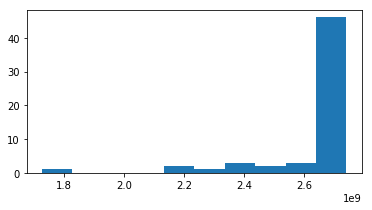

In [21]:
plt.figure(figsize = (6, 3))
df['jobid'].hist()
plt.grid(False)
plt.show();

### jobtitleid

In [22]:
df['jobtitleid'].value_counts().head()

-1          28
 119899     19
 1293511     2
 893118      1
 406074      1
Name: jobtitleid, dtype: int64

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Job title ID "-1" appears to be given to job titles that are wordier than the standard set.  See examples below. 

In [23]:
## check out -1
df.loc[df['jobtitleid'] == -1, 'title'].value_counts()[:10]

CCB - Risk-Fraud Data Scientist/Modeler-ML-Associate    2
Senior Data Scientist - BLAW                            1
Data Scientist - Scientific Computing                   1
Data Scientist-Revenue                                  1
DATA SCIENTIST - SCIENTIFIC COMPUTING                   1
Innovation & Technology Data Scientist                  1
Senior Data Scientist (Financial Services)              1
CIB QR - Quantitative Research Treasury Services –VP    1
Genomic Data Scientist                                  1
Data Scientist - Pricing                                1
Name: title, dtype: int64

In [24]:
## check out not -1
jobtitleid_dict = {}
for jobtitleid in list(df['jobtitleid'].value_counts().index):
    if jobtitleid == -1:
        pass
    else:
        x = df.loc[df['jobtitleid'] == jobtitleid, 'title'].value_counts()
        jobtitleid_dict.update({jobtitleid : (x.index)[0]})
        print(str(jobtitleid) + '    ', '\t', x.sum(), '\t', list(x.index))

119899     	 19 	 ['Data Scientist']
1293511     	 2 	 ['Manager, Data Scientist']
893118     	 1 	 ['Data Scientist / Statistician']
406074     	 1 	 ['Jr Data Scientist']
3042870     	 1 	 ['Data Scientist, Marketing']
3206325     	 1 	 ['Data Scientist - Senior Associate']
3568281     	 1 	 ['Senior Associate, Data Scientist']
274009     	 1 	 ['Senior Data Scientist']
3069904     	 1 	 ['Sr. Data Scientist']
3093646     	 1 	 ['AI Research Scientist']
478272     	 1 	 ['Data Scientist II']


## Selection

In [25]:
already_applied = [
    ## Two Sigma
    2722723989,
    2399151231,
    2399151229,
    1819879820,
    
    ## HotelTonight
    2699359507,
    
    ## Enigma
    2394390409,
    
    ## Intent Media
    2557056478,
    
    ## Spotify
    2697559288,
    
    ## Goldman Sachs
    2694902862,
    
    ## PwC
    2729664491,
    
    ## McKinsey
    2690497767,
    
    ## KPMG
    2699280853,
    
    ## JP Morgan
    2730138226,
    2698644772, ## python/open source --> good
    2689012522,
]

under_over_qual = [
    ## Two Sigma
    2574562599, ## PhD
    1876536512, ## PhD
    
    ## Citi
    2449258018, ## mortgage expertise
    2360995902, ## C++, min 2yr interest rate deriv modeling
    2665869193, ## 3yr trading exp/etc
    2665737860, ## 3yr trading exp/etc
    2617778959, ## 'good equity derivatives knowledge'
    2620484252, ## 'good equity derivatives knowledge'
    
    ## Spotify
    2736550824, ## 8yr exp
    
    ## Mizuho Financial Group 
    2732951235, ## SAS
    
    ## JP Morgan
    2702715467, ## SAS/Oracle/SQL in application
    2702714898, ## SAS/Oracle/SQL in application
    2728130694, ## way too many spec questions in application
    
    ## PIMCO
    2696214703, ## 7-10yr exp
    
    ## Goldman Sachs
    2646037850, ## capital markets exp
    
    
]

mask = [False if x in already_applied else True for x in df['jobid']]

df = df[mask]

mask = [False if x in under_over_qual else True for x in df['jobid']]

df = df[mask]

In [26]:
## these are excluded based on bad glassdoor reviews 
## (mostly poor-management-by-overwhelmingly-male-leadership-related stuff), 
## or because the work involves something i can't see myself doing day in/day out
## OR miscellaneous

no = [
    'Trade Desk',
    'StockTwits',
    'Betterment',
    'BlueLine Associates',
    'Datadog',
    'FactSet',
    'Bluecore',
    'Impact',
    'Oliver Wyman',
    'Citadel',
    'Ayasdi',
    'AIG',
    'Via', ## sorry saar! :)
    'HelloFresh',
    'BNP Paribas',
    'Vettery',
    'Zillow',
    'Open Systems Technologies (NYC)'
]

mask = [False if x in no else True for x in df['orgname']]

df = df[mask]

In [27]:
df.sort_values(by = 'maxsal', ascending = False)[['title', 'dateposted', 'industry', 'orgname', 'stars', 'jobid', 'minsal', 'medsal', 'maxsal']][:30]

,title,dateposted,industry,orgname,stars,jobid,minsal,medsal,maxsal
102,Senior Data Scientist - BLAW,2018-04-12,Information Technology,Bloomberg,3.6,2639379998,153000,186000,227000
158,"Director, Data Scientist/Statistics -- Financi...",2018-04-18,Accounting & Legal,KPMG International,3.8,2698362935,145000,175000,215000
144,CIB-Data Scientist Vice President,2018-04-12,Finance,J.P. Morgan,3.7,2730828640,137000,167000,202000
509,CIB QR - Credit Quantitative Research Electron...,2018-04-09,Finance,J.P. Morgan,3.7,2661177773,135000,157000,194000
45,Data Scientist (Royalty Analytics),2018-04-12,Information Technology,Spotify,4.0,2731664839,131000,157000,189000
68,Data Scientist - Fixed Income Real-Time Pricing,2018-04-21,Information Technology,Bloomberg,3.6,2647271303,127000,153000,187000
104,"Data Scientist, Assurance (FIDS, FTDS)(Manager...",2018-04-13,Accounting & Legal,EY,3.7,2731948794,123000,151000,183000
0,Data Scientist,2018-04-16,Information Technology,Integral Ad Science,3.7,2735259369,120000,145000,174000
3,Data Scientist,2018-04-19,Media,The New York Times Company,3.7,2739492680,109000,136000,167000
66,Data Scientist II,2018-04-12,Information Technology,Grubhub,3.7,2730992233,112000,137000,166000


In [28]:
df.sort_values(by = 'dateposted', ascending = False)[['title', 'dateposted', 'industry', 'orgname', 'stars', 'jobid', 'minsal', 'medsal', 'maxsal']][:30]

,title,dateposted,industry,orgname,stars,jobid,minsal,medsal,maxsal
68,Data Scientist - Fixed Income Real-Time Pricing,2018-04-21,Information Technology,Bloomberg,3.6,2647271303,127000,153000,187000
2,Genomic Data Scientist,2018-04-20,Information Technology,Medidata Solutions,3.9,2740394669,78000,96000,117000
85,"Principal Associate, Data Scientist - Time Series",2018-04-20,Finance,Capital One,3.9,2701234460,101000,124000,150000
88,AI Research Scientist,2018-04-20,Information Technology,Bloomberg,3.6,2554413332,86000,104000,126000
35,"Data Scientist, Personalization and Recommenda...",2018-04-20,Information Technology,Tumblr,4.0,2321589953,109000,133000,161000
33,Data Scientist,2018-04-19,Business Services,MediaMath,3.9,2699428805,83000,101000,123000
3,Data Scientist,2018-04-19,Media,The New York Times Company,3.7,2739492680,109000,136000,167000
158,"Director, Data Scientist/Statistics -- Financi...",2018-04-18,Accounting & Legal,KPMG International,3.8,2698362935,145000,175000,215000
187,CCB - Risk-Fraud Data Scientist/Modeler-ML-Ass...,2018-04-18,Finance,Chase,3.6,2668560667,90000,110000,134000
49,Innovation & Technology Data Scientist,2018-04-17,Accounting & Legal,PwC,3.8,2736947648,105000,127000,156000


In [29]:
df.sort_values(by = 'stars', ascending = False)[['title', 'dateposted', 'industry', 'orgname', 'stars', 'jobid', 'minsal', 'medsal', 'maxsal']][:30]

,title,dateposted,industry,orgname,stars,jobid,minsal,medsal,maxsal
32,Data Scientist,2018-04-17,Non-Profit,New York Presbyterian,5.0,2739782838,68000,86000,110000
4,Data Scientist,2018-04-10,Information Technology,SeatGeek,4.9,2204974404,94000,115000,142000
63,Data Scientist-Revenue,2018-04-09,Information Technology,Better Mortgage,4.6,2661378399,97000,122000,149000
42,Data Scientist,2018-04-11,Finance,National Debt Relief,4.2,2690909493,50000,64000,80000
11,Data Scientist,2018-04-17,Information Technology,Dataminr,4.2,1727892555,83000,103000,125000
12,Data Scientist,2018-04-13,Information Technology,Enigma,4.1,2733226886,97000,119000,143000
45,Data Scientist (Royalty Analytics),2018-04-12,Information Technology,Spotify,4.0,2731664839,131000,157000,189000
35,"Data Scientist, Personalization and Recommenda...",2018-04-20,Information Technology,Tumblr,4.0,2321589953,109000,133000,161000
33,Data Scientist,2018-04-19,Business Services,MediaMath,3.9,2699428805,83000,101000,123000
2,Genomic Data Scientist,2018-04-20,Information Technology,Medidata Solutions,3.9,2740394669,78000,96000,117000


### date posted

In [30]:
df['dateposted'] = [dt.strptime(x, '%Y-%m-%d') for x in df['dateposted']]
df['validthrough'] = [dt.strptime(x, '%Y-%m-%d') for x in df['validthrough']]

In [32]:
df['dateposted'].value_counts()

2018-04-17    6
2018-04-13    5
2018-04-12    5
2018-04-20    4
2018-04-11    3
2018-04-10    3
2018-04-16    2
2018-04-09    2
2018-04-08    2
2018-04-14    2
2018-04-19    2
2018-04-18    2
2018-04-21    1
Name: dateposted, dtype: int64

In [33]:
df['validthrough'].value_counts()

2018-05-22    39
Name: validthrough, dtype: int64